In [1]:
%matplotlib notebook
%matplotlib notebook

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Polygon, PathPatch
from matplotlib.path import Path
from matplotlib.ticker import AutoLocator, AutoMinorLocator, FormatStrFormatter

In [2]:
def load_data():
    fpath = os.path.join(os.getcwd(), 'data',
                         'ONS_UK_SuicideStatistics.csv')

    data = pd.read_csv(fpath)
    # the first and last indices of Age are strings <10 and 90+
    # <10 has no data (all zeroes)
    # 90+ will be plotted at 90 anyway. The + can be reflected by
    # changing the axis tick labels. int type for age will be easier
    # to deal with than str type.
    data = data.drop(0)
    data.loc[data.index[-1], 'Age'] = 90
    data = data.astype({'Age': int})

    return data

In [3]:
def set_axis_appearance(axis):
    for side in ['left', 'right', 'top', 'bottom']:
        axis.spines[side].set_visible(False)
    axis.tick_params(axis='both', which='both',
                    left=False, right=False, bottom=False, top=False,
                    labelbottom=False, labelleft=False)

In [4]:
def set_bottom_axis_appearance(axis, xmin, xmax, label_colour=None):
    spine_colour = '#363636'
    minor_tick_colour = '#8A8A8A'
    
    axis.spines['bottom'].set_visible(True)
    axis.spines['bottom'].set_color(spine_colour)
    axis.spines['bottom'].set_bounds(xmin, xmax)
    axis.tick_params(axis='x', bottom=True, labelbottom=True)
    axis.tick_params(axis='x', which='major', bottom=True, colors=spine_colour)
    axis.tick_params(axis='x', which='minor', bottom=True, length=3, colors=minor_tick_colour)
    
    axis.set_xlim([xmin,xmax])
    axis.xaxis.set_major_locator(AutoLocator())
    axis.set_xticklabels(axis.get_xticks())
    axis.xaxis.set_minor_locator(AutoMinorLocator())
    
    xlabels = [f'{float(label.get_text()):.0f}' for label 
                    in axis.get_xticklabels(which='major')]
    xlabels[0] = f'<{xlabels[0]}'
    xlabels[-1] = f'{xlabels[-1]}+'
    axis.set_xticklabels(xlabels)
    axis.set_xlabel('Age')
    axis.xaxis.label.set_color(label_colour)


In [5]:
def enter_axes(event):
    print('enter_axes', event.inaxes)
    event.inaxes.patch.set_facecolor('yellow')
    event.canvas.draw()
    #TODO: if no axis was entered before event, make all other axes low alpha
    #TODO: entered axis needs to show x-axis & y-axis
    #TODO: the last axis usually has it's x-axis on display. need to turn that off.

In [6]:
def leave_axes(event):
    print('leave_axes', event.inaxes)
    event.inaxes.patch.set_facecolor('white')
    event.canvas.draw()
    #TODO: give the axis being left a low alpha to put it in the background
    #TODO: if no axis is entered, make all axes visible/normal alpha

In [7]:
def create_plot():
    df = load_data()
    years = df.columns.values[~df.columns.isin(['Age'])]
    # years = df.columns.values[~df.columns.isin(['Age']) & df.columns.isin(['1982', '1999', '2000', '1984', '1985', '2015', '2013'])]
    cmap = cm.get_cmap('Blues', 150)
    nrows = len(years)
    fig, axes = plt.subplots(nrows=nrows, figsize=(6, 0.2*nrows), sharex=True)
    fig.subplots_adjust(bottom=0.09, top=0.97, left=0.06, right=0.93, hspace=-0.8)

    a,b = 10, 90
    label_colour = '#363636'

    for axis, year in zip(axes, years):
        axis.plot(df['Age'], df[year], c='#FFFFFF', alpha=0)
        axis.autoscale(False)
        axis.patch.set_alpha(0)

        poly_vertices = [(a, 0)] + list(zip(df['Age'], df[year])) + [(b, 0)]
        polygon = Polygon(poly_vertices, color='none')
        patch = axis.add_patch(polygon)

        img = np.expand_dims(df['Age'].values, axis=1)
        axis.imshow(img, cmap=cmap, origin='lower', aspect='auto', 
                clip_path=patch, clip_on=True, extent=[10,90,0,150])
        
        axis.annotate(year, (1.015, 0.02),
                    xycoords='axes fraction',
                    va='bottom', ha='left', color='k',
                    fontsize='small', c=label_colour)
        set_axis_appearance(axis)
        
    set_bottom_axis_appearance(axes[-1], a, b, label_colour)


    fpath = os.path.join(os.path.split(os.getcwd())[0], 'Output_Figures', 'SuicideStatistics.png')
    fig.savefig(fpath, bbox_inchex='auto', pad_inches=0)
    
    cid_enter = fig.canvas.mpl_connect('axes_enter_event', enter_axes)
    cid_leave = fig.canvas.mpl_connect('axes_leave_event', leave_axes)
    plt.show()

In [8]:
# cid_enter = fig.canvas.mpl_connect('axes_enter_event', enter_axes)
# cid_leave = fig.canvas.mpl_connect('axes_leave_event', leave_axes)

<IPython.core.display.Javascript object>


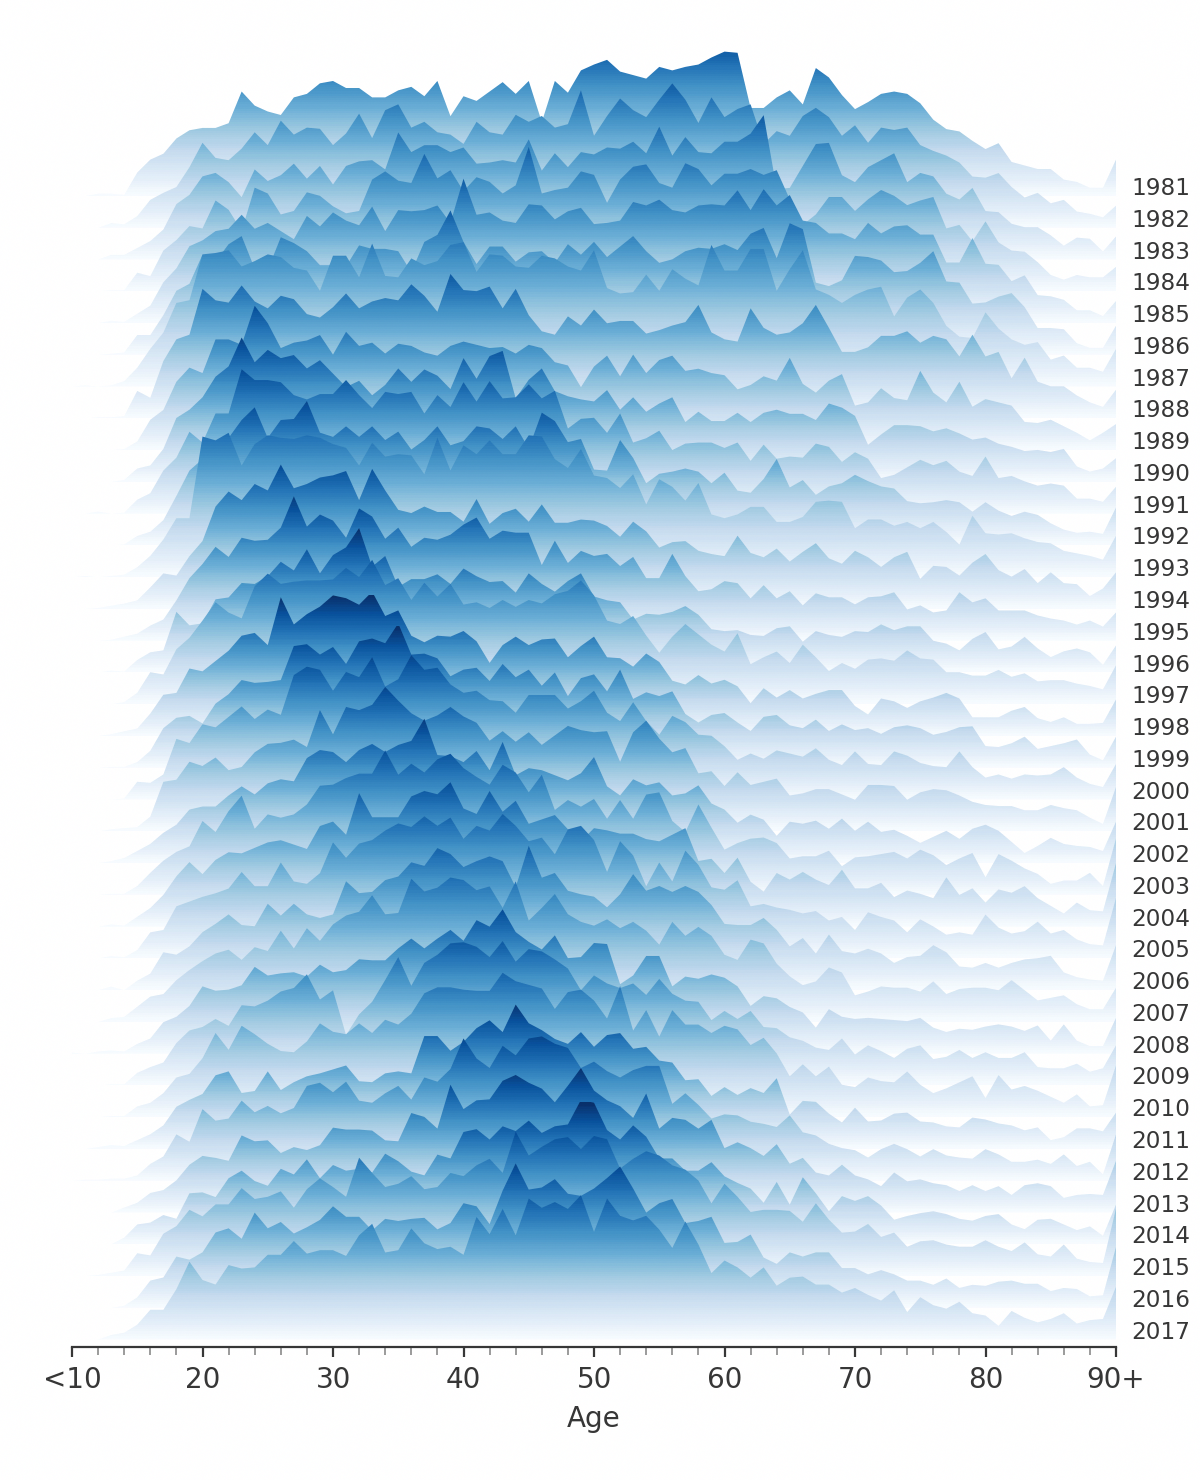

In [9]:
create_plot()